# 基尼系数

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# 边界绘制函数
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

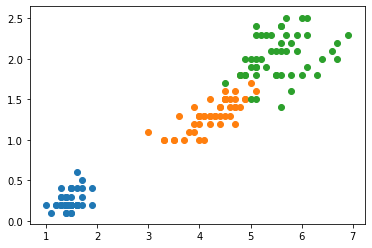

In [2]:
# 数据加载
iris = datasets.load_iris()
x = iris.data[:, 2:]
y = iris.target

plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3, criterion="gini")
dt_clf.fit(x, y)
dt_clf.score(x, y)

0.9733333333333334

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'


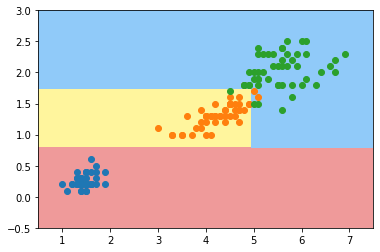

In [4]:
plot_decision_boundary(dt_clf, [0.5, 7.5, -0.5, 3])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.scatter(x[y==2, 0], x[y==2, 1])
plt.show()

## 模拟使用基尼系数

In [5]:
from collections import Counter

def split(x, y, d, value):
    index_a = (x[:, d] <= value)
    index_b = (x[:, d] > value)
    return x[index_a], x[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p ** 2
    return res

def try_split(x, y):
    best_gini = float("inf")
    best_d, best_v = -1, -1
    for d in range(x.shape[1]):
        sorted_index = np.argsort(x[:, d])
        for i in range(1, len(x)):
            if x[sorted_index[i-1], d] != x[sorted_index[i], d]:
                v = (x[sorted_index[i-1], d] + x[sorted_index[i], d]) / 2
                x_l, x_r, y_l, y_r = split(x, y, d, v)
                g = gini(y_l) + gini(y_r)
                if g < best_gini:
                    best_gini, best_v, best_d = g, v, d
    
    return best_gini, best_d, best_v

### 第一次划分

In [6]:
best_gini, best_d, best_v = try_split(x, y)
print("best_gini : ", best_gini)
print("best_d : ", best_d)
print("best_v : ", best_v)

best_gini :  0.5
best_d :  0
best_v :  2.45


In [7]:
x1_l, x1_r, y1_l, y1_r = split(x, y, best_d, best_v)
gini(y1_l)

0.0

### 第二次划分

In [8]:
best_gini, best_d, best_v = try_split(x1_r, y1_r)
print("best_gini : ", best_gini)
print("best_d : ", best_d)
print("best_v : ", best_v)

best_gini :  0.2105714900645938
best_d :  1
best_v :  1.75
